### Importing Libraries

In [1]:
#Importing data manipulation libraries

import numpy as np
import pandas as pd

#Importing data visualization libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
import squarify
import matplotlib

In [2]:
#Market basket analysis using apriori

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#Preprocessing

from mlxtend.preprocessing import TransactionEncoder

#For printing interactive output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


### Importing Data

In [3]:
data = pd.read_csv('Downloads\Market Basket Analysis.csv', header=None)
data.shape

(7501, 20)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Converting into required format of TransactionEncoder

trans = []
for i in range(0,7501):
    trans.append([str(data.values[i,j]) for j in range(0,20)])
    
trans=np.array(trans)
print(trans.shape)

(7501, 20)


In [7]:
#Using TransactionEncoder

t=TransactionEncoder()
data=t.fit_transform(trans)
data=pd.DataFrame(data, columns=t.columns_, dtype=int)

data.shape

(7501, 121)

In [8]:
data.drop('nan', axis=1, inplace=True)
data.shape

(7501, 120)

In [9]:
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Data Visualizations

<Figure size 1440x720 with 0 Axes>

[Text(0, 0, 'mineral water'),
 Text(0, 0, 'eggs'),
 Text(0, 0, 'spaghetti'),
 Text(0, 0, 'french fries'),
 Text(0, 0, 'chocolate'),
 Text(0, 0, 'green tea'),
 Text(0, 0, 'milk'),
 Text(0, 0, 'ground beef'),
 Text(0, 0, 'frozen vegetables'),
 Text(0, 0, 'pancakes'),
 Text(0, 0, 'burgers'),
 Text(0, 0, 'cake'),
 Text(0, 0, 'cookies'),
 Text(0, 0, 'escalope'),
 Text(0, 0, 'low fat yogurt'),
 Text(0, 0, 'shrimp'),
 Text(0, 0, 'tomatoes'),
 Text(0, 0, 'olive oil'),
 Text(0, 0, 'frozen smoothie'),
 Text(0, 0, 'turkey')]

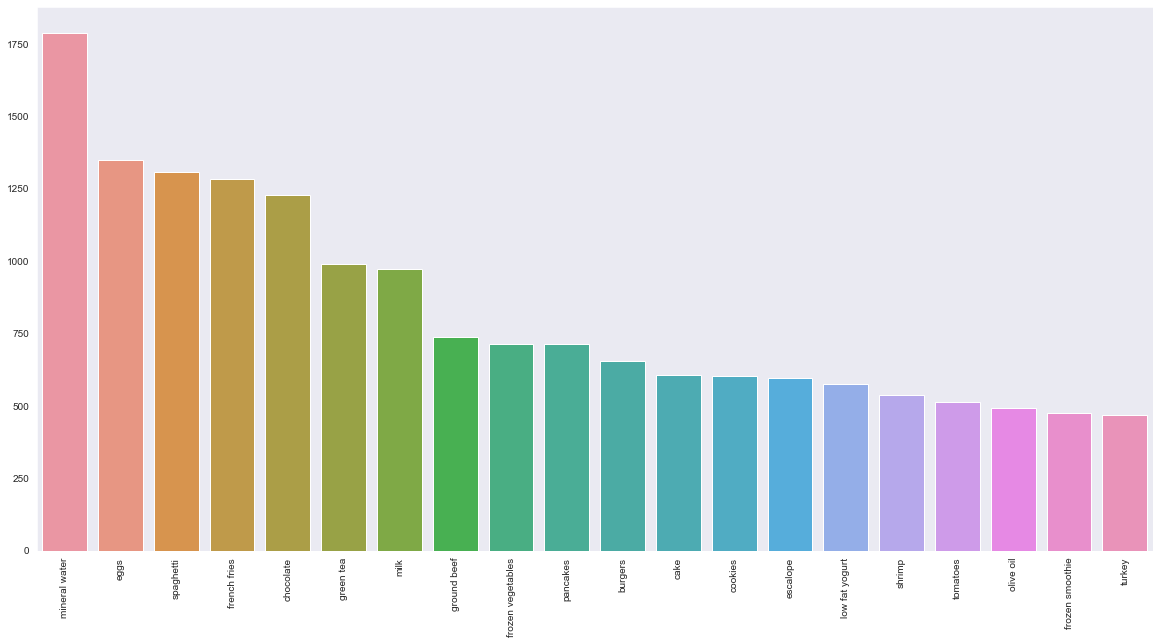

In [10]:
#Considering the top 20 items purchased frequently

r=data.sum(axis=0).sort_values(ascending=False)[:20]
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index, y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Top 20 items')

(0.0, 100.0, 0.0, 100.0)

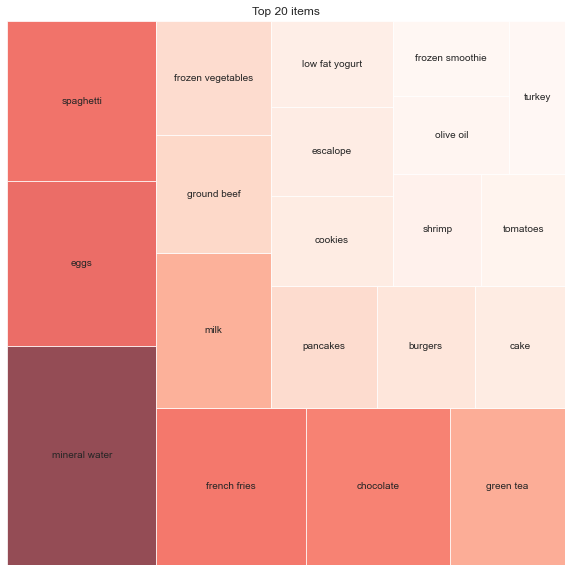

In [11]:
my_values=r.values
cmap = matplotlib.cm.Reds
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

#Treemap of top 20 frequent items
plt.figure(figsize=(10,10))
squarify.plot(sizes=r.values, label=r.index, alpha=.7,color=colors)
plt.title("Top 20 items")
plt.axis('off')

# Apriori Algorithm

In [12]:
#Items with atleast 5% support

freq_items=apriori(data,min_support=0.05,use_colnames=True)

In [13]:
freq_items

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [14]:
#Generating association rules

res=association_rules(freq_items,metric="lift", min_threshold=1.3)

In [15]:
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


### Selecting and Filtering the Results

In [16]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


In [17]:
#Returning item sets with length = 2 and support more than 10%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]


,support,itemsets,length
25,0.052660,"(chocolate, mineral water)",2
26,0.050927,"(eggs, mineral water)",2
27,0.059725,"(spaghetti, mineral water)",2


In [18]:
#Returning item sets with length = 1 and support more than 10%

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]


,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


### Association Mining

In [19]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'eggs', 'mineral water'} ]

,support,itemsets,length
26,0.050927,"(eggs, mineral water)",2


In [20]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'mineral water'} ]

,support,itemsets,length
16,0.238368,(mineral water),1


In [21]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chocolate'} ]

,support,itemsets,length
3,0.163845,(chocolate),1


# Frequent Pattern (FP) Growth Algorithm

In [22]:
#Importing Libraries

from mlxtend.frequent_patterns import fpgrowth

In [23]:
res=fpgrowth(data,min_support=0.05,use_colnames=True)

In [24]:
res

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.179709,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


In [25]:
res=association_rules(res,metric="lift",min_threshold=1)

In [26]:
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
1,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
4,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
5,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256


## Apriori vs FP Growth

In [27]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(data,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(ground beef, milk, mineral water)"
253,0.017064,"(spaghetti, ground beef, mineral water)"
254,0.015731,"(spaghetti, milk, mineral water)"
255,0.010265,"(spaghetti, olive oil, mineral water)"


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)
...,...,...
98,0.020131,"(whole wheat rice, mineral water)"
99,0.022930,"(spaghetti, olive oil)"
100,0.025197,"(spaghetti, pancakes)"
101,0.021197,"(spaghetti, shrimp)"


,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
5,0.046794,(champagne)
6,0.059992,(chicken)
7,0.163845,(chocolate)
8,0.080389,(cookies)
9,0.051060,(cooking oil)


,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.046794,(champagne)
3,0.059992,(chicken)
4,0.163845,(chocolate)
5,0.080389,(cookies)
6,0.051060,(cooking oil)
7,0.179709,(eggs)
8,0.079323,(escalope)
9,0.170911,(french fries)


,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [28]:
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(data,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
...,...,...
252,0.011465,"(burgers, cake)"
253,0.014131,"(green tea, cake)"
254,0.010265,"(cake, frozen vegetables)"
255,0.011865,"(cake, pancakes)"


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
...,...,...
98,0.040928,"(ground beef, mineral water)"
99,0.039195,"(spaghetti, ground beef)"
100,0.021997,"(ground beef, milk)"
101,0.023064,"(ground beef, chocolate)"


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.047460,(honey)
7,0.042528,(salmon)
8,0.033329,(avocado)
9,0.031862,(cottage cheese)


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.047460,(honey)
7,0.042528,(salmon)
8,0.179709,(eggs)
9,0.087188,(burgers)


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.179709,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


### Run Time Comparison

Text(0.5, 0, 'Minimum Support Threshold')

Text(0, 0.5, 'Run Time in ms')

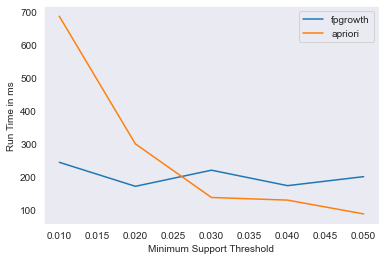

In [29]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Minimum Support Threshold")
plt.ylabel("Run Time in ms")